# Analisando dados do desastre do navio Titanic

Será analisado o conjunto de dados `titanic-data-6.csv`, disponibilizado no [Kaggle](https://www.kaggle.com/c/titanic/data).
As informações disponibilizadas neste Notebook não são conclusivas, visto que o conjunto de dados não possui todas informações necessárias para tal.
Acredito que a confiança dos dados estatísticos gerados nesse documento é cerca de 70% confiavel, vendo que a amostra não é tão grande cerca de 40% dos dados reais.
### Questões importantes:
- Qual a porcentagem de mortes do naufrágo?
- Qual a faixa etária da tripulação e passageiros?
- Em que faixa etária teve mais sobrevivente e mortos?
- Havia mais homens ou mulheres no Titanic?
- Entre homens e mulheres qual teve mais sobreviventes?

In [2]:
# Imports e carregamento do conjunto de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')

### Limpeza dos dados
Removendo colunas que não seram analisadas, como cabine que possui muitos valores nulos, impossibilitando tirar dados relevantes e como local de embarque que não tem tanta interação com outras colunas, também os de parentes como `SibSp, Parch`.

In [3]:
# Verificando o conjunto lido
df_titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# Removendo as colunas
df_titanic.drop(['Cabin', 'Embarked', 'SibSp', 'Parch'], axis=1, inplace=True)

In [5]:
# Verificando a remoção das colunas
df_titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25


Verificando se por algum motivo possa haver dados duplicados no conjunto de dados.

In [6]:
# Certificando que não possui dados duplicados
sum(df_titanic.duplicated())

0

Colocando os rótulos em caixa baixa, para obter padrão das strings.

In [7]:
# Substituindo os rótulos
df_titanic.rename(columns=lambda x: x.lower(), inplace=True)

In [8]:
# Verificando a substituição
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,ticket,fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500


Verificando a existência de valores nulos que podem atrapalhar na análise.

In [9]:
# Verificando valores faltantes
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
ticket           0
fare             0
dtype: int64

In [10]:
# Removendo linhas nulas
df_titanic.dropna(subset=['age'], inplace=True)

In [11]:
# Verificando a remoção
df_titanic.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
ticket         0
fare           0
dtype: int64

## Efetuando a análise dos dados

### Qual a porcentagem de mortes do naufrágo?

Fazendo uma pesquisa é possivel ver que os valores de pessoas mortas não batem, de acordo com site [History](https://seuhistory.com/noticias/verdade-por-tras-do-naufragio-do-titanic), onde morreram 1513 pessoas, como o conjunto é para uma análise estatística é suficiente o tamanho da amostra.

In [12]:
# Contagem total da coluna 'Survived'
survived_size = df_titanic['survived'].count()
# Contagem separada pelos valores
survived_list = df_titanic['survived'].value_counts()
print('(NO CONJUNTO DE DADOS) - Mortes no naufrágo: {} pessoas'.format(survived_list[0]))

(NO CONJUNTO DE DADOS) - Mortes no naufrágo: 424 pessoas


In [13]:
# Criando listas com informações para geração de um gráfico de pizza ou pie(torta em inglês)
labels = ['Sobreviventes', 'Mortos']
sizes = [(survived_list[1]/survived_size)*100, (survived_list[0]/survived_size)*100]
colors = ['Blue', 'Red']
sizes

[40.61624649859944, 59.38375350140056]

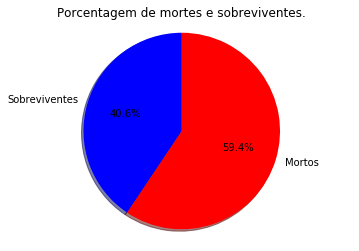

In [14]:
# Passando os paramêtros para geração do gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Porcentagem de mortes e sobreviventes.')
plt.show();

É possivel observar que mais da metade das pessoas abordo acabaram não sobrevivendo.

### Qual a faixa etária da tripulação e passageiros?

In [15]:
# Valores de intervalo
edges = [0, 16, 30, 60, 100]

In [16]:
# Rótulos para serem usados nos intevalos
ages = ['Criança', 'Jovem', 'Adulto', 'Idoso']

In [17]:
# Criando uma nova coluna e inserido os rótulos de acordo com os intervalos
df_titanic['age_group'] = pd.cut(df_titanic['age'], edges, labels=ages)

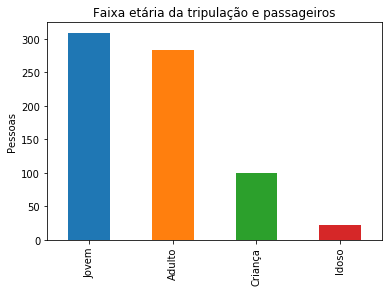

In [18]:
# Geração de um gráfico de barras para mostrar faixa de idade da tripulação e passageiros
df_titanic['age_group'].value_counts().plot(kind='bar',title='Faixa etária da tripulação e passageiros');
plt.ylabel('Pessoas');

Com a análise deste gráfico pode-se entender que os passageiros e tribulação a bordo eram, em sua maioria, jovens e adultos.

### Em que faixa etária teve mais sobrevivente e mortos?

In [19]:
# Agrupando para ser feito o gráfico
age_counts = df_titanic.groupby(['survived', 'age_group']).count()['passengerid']

In [20]:
# Verificando agrupamento
age_counts

survived  age_group
0         Criança       45
          Jovem        198
          Adulto       164
          Idoso         17
1         Criança       55
          Jovem        111
          Adulto       119
          Idoso          5
Name: passengerid, dtype: int64

In [21]:
# A localização das barra no eixo 'x'
ind = np.arange(len(age_counts)/2)
# Tamanho das barras
width = 0.35

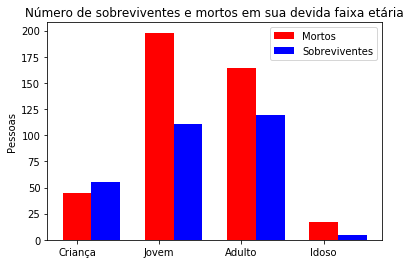

In [22]:
# Gerando gráfico de barras para comparação usando matplotlib
plt_died = plt.bar(ind, age_counts[0], width, color='r')
plt_survived = plt.bar(ind + width, age_counts[1], width, color='b')

plt.ylabel('Pessoas')
plt.title('Número de sobreviventes e mortos em sua devida faixa etária')
plt.xticks(ind, ('Criança', 'Jovem', 'Adulto', 'Idoso'))
plt.legend((plt_died[0], plt_survived[0]), ('Mortos', 'Sobreviventes'))

plt.show();

Aqui neste gráfico é visível que como jovens e adultos eram em maioria, a maior quantia de mortes foi nessa faixa de idade. É possivel ver que, idoso com uma pequena quantia a bordo, bem pouco foram capazes de sobreviver.

### Havia mais homens ou mulheres no Titanic?

In [23]:
# Separando a contagem de 'male' e 'female'
male = df_titanic['sex'].value_counts()[0]
female = df_titanic['sex'].value_counts()[1]
# Pegando todos os registros da coluna 'Sex'
sex_size = df_titanic['sex'].count()

In [24]:
# Criando listas com informações para geração de um gráfico de pizza ou pie(torta em inglês)
labels = ['Mulheres', 'Homens']
sizes = [(female/sex_size)*100, (male/sex_size)*100]
colors = ['lightcoral', 'lightskyblue']
sizes

[36.554621848739494, 63.4453781512605]

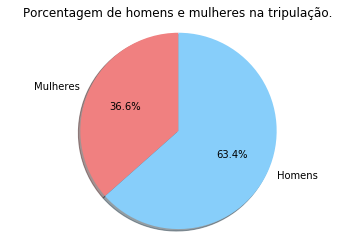

In [25]:
# Geração do gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Porcentagem de homens e mulheres na tripulação.')
plt.show();

Os passageiros e tripulação do Titanic eram principalmente constituida por homens.

### Entre homens e mulheres qual teve mais sobreviventes?

In [26]:
# Agrupando sobreviventes com sexo e fazendo a contagem dos mesmos
sex_count = df_titanic.groupby(['survived', 'sex']).count()['passengerid']

In [27]:
# Verificando o agrupamento e contagem
sex_count

survived  sex   
0         female     64
          male      360
1         female    197
          male       93
Name: passengerid, dtype: int64

In [28]:
# Obtendo uma lista com os indices do eixo 'x' para o gráfico
ind = np.arange(len(sex_count)/2)

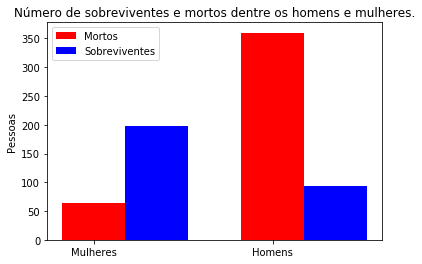

In [29]:
# Geração do gráfico
plt_died = plt.bar(ind, sex_count[0], width, color='r')
plt_survived = plt.bar(ind + width, sex_count[1], width, color='b')

plt.ylabel('Pessoas')
plt.title('Número de sobreviventes e mortos dentre os homens e mulheres.')
plt.xticks(ind, ('Mulheres', 'Homens'))
plt.legend((plt_died[0], plt_survived[0]), ('Mortos', 'Sobreviventes'))

plt.show();

Neste gráfico consegue se observar que apesar da menor quantidade de mulheres a bordo do navio foram as que mais sobreviveram, muito provavelmente sobre a questão de botes salva vidas que devia levar primeiramente as mulheres e crianças.

### Sobre a análise
Com o conjunto de dados utilizado é possivel chegar a algumas estimativas, pois seu número de dados registrados é de 891, que é menor do que consta na história de acordo com o [History](https://seuhistory.com/hoje-na-historia/inicia-se-tragedia-do-titanic) eram 2224 passageiros incluindo a tripulação. Sendo assim não se pode ter 100% de conclusão com esses dados.
Mas com essa análise foi possivel chegar a números proximos como conseguimos ver que a bordo do navio possuia mais homens do que mulheres, e que ele realmente utilizaram regras de prioridade pois a proporção de mulheres que sobreviveram é maior. Haviam mais jovens e adultos a bordo, e que também seguindo a prioridade o número de crianças salvas é maior do que mortas, já os idosos obteve maior indice de mortes.